# TCS Internship - Forecasting Model

### Data Collection

---
The data is been collected from Kaggle and then it is uploaded to the github repository for importing in python

The Dataset consists of Data on TATA Global Stocks from the year 2010 to 2018.

Kaggle Dataset - https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [228]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [229]:
#Importing datasets
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [230]:
df.head() #top 5 entries from the dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [231]:
df.tail() #last 5 entries from the dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [232]:
#Shape of dataset
df.shape

(2035, 8)

### Data Processing
---
In this step data is been further processed and cleaned for EDA and modeling


In [233]:
#Statistical description of the data
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [234]:
#finding realtion between the variables
df.corr() 

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


In [235]:
#info of datatypes, rows, columns, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


Data Cleaning

In [236]:
#Checking the null values
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

There are no null values in the given dataset

In [237]:
#Converting datatype of date into datetime from object
df['Date'] = pd.to_datetime(df['Date'])

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [239]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [240]:
#Setting Date column as index
df.set_index('Date')

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


In [241]:
#Checking the starting and ending date of the dataset
print(df['Date'].min())
print(df['Date'].max())

2010-07-21 00:00:00
2018-09-28 00:00:00


In [242]:
#Creating month and year column
df['Month'] = df['Date'].apply(lambda x: x.strftime ('%y-%m'))
df['Year'] = df['Date'].apply(lambda x: x.strftime ('%y'))
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Month,Year
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,18-09,18
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,18-09,18
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,18-09,18
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,18-09,18
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,18-09,18


### Data Visualization

In [243]:
import plotly.graph_objects as go

#making candlestick graph for tesla dataset
go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

This is a candlestick diagram in which we can understand that the tata stock drastically increased in the year 2017-18.

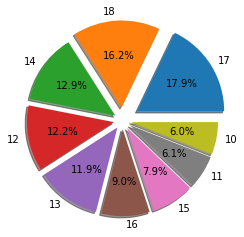

In [244]:
#Piechart for Volume of shares through the years
pc = df[['Year', 'Total Trade Quantity']]
vol = pc.groupby('Year')['Total Trade Quantity'].mean().sort_values(ascending = False).reset_index()

plt.pie(vol['Total Trade Quantity'], labels=vol['Year'],
        explode = (0.2,0.15,0.1,0.1,0.1,0.1,0.1,0.1,0.1),
        autopct = '%1.1f%%',
        shadow=True)
plt.show()

We can clearly see that te maximum volume of Tata stocks is been traded in the year 2017

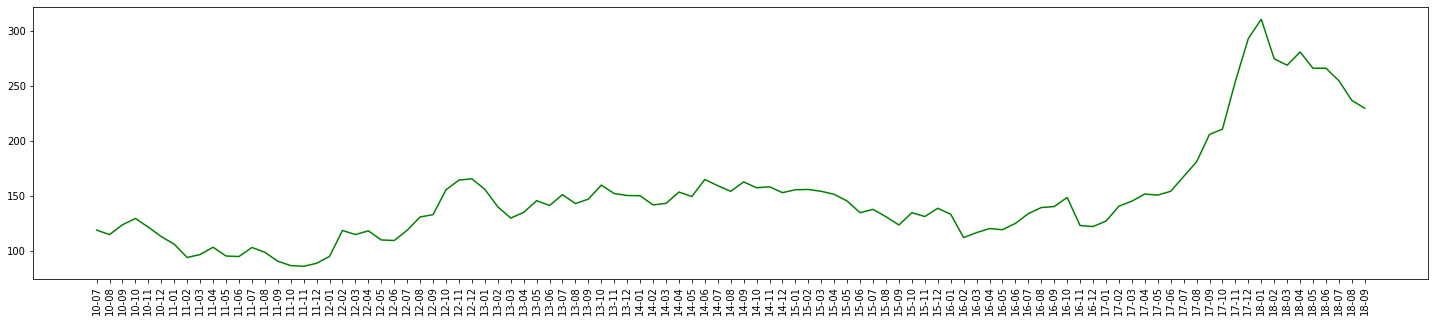

In [245]:
#Share prices on monthly basis
a = df.groupby('Month')['Close'].mean()
plt.figure(figsize=(25,5))
plt.plot(a, color = 'green')
plt.xticks(rotation = 'vertical')
plt.show()

Here we can see that the maximum price of the Tesla stock was reached in year 2017 in the month of December.

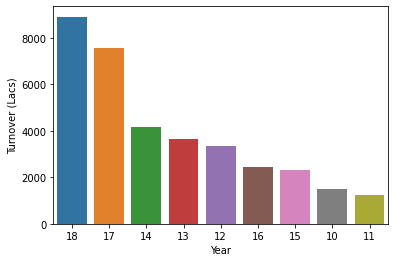

In [246]:
trd = df[['Year','Turnover (Lacs)']]
a = trd.groupby('Year')['Turnover (Lacs)'].mean().sort_values(ascending = False).reset_index()

sns.barplot(a['Year'], a['Turnover (Lacs)'])
plt.show()

We can see that the year 2018 was the year with highest turnover followed by 2017 and 2014. Year 2011 was the year where the turnover was the least.

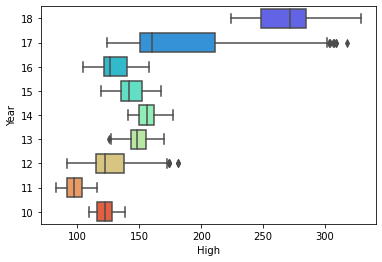

In [247]:
sns.boxplot(df['High'], df['Year'], palette = 'rainbow')

The boxplot tells us that in the year 2018 tata stock reached to its highest value

### More Feature Engineering and EDA

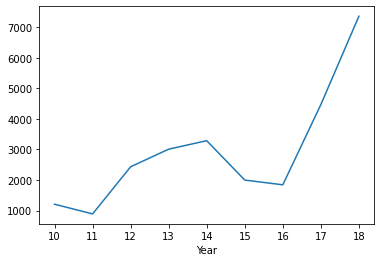

In [248]:
df.groupby('Year')['Turnover (Lacs)'].median().plot()

Though the annual turnover from 2016 is growing it is not showing any linear relationship with years

In [249]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  8


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [250]:
continous_feature = [feature for feature in numerical_features if feature not in ['Turnover (Lacs)']]
print(len(continous_feature))

7


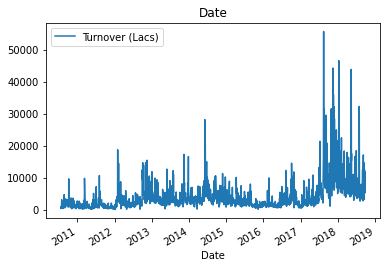

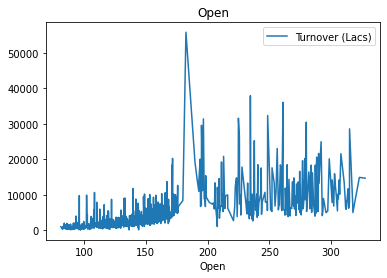

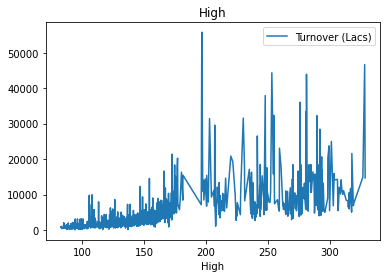

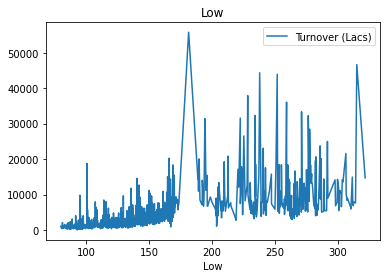

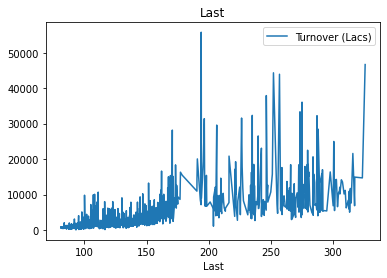

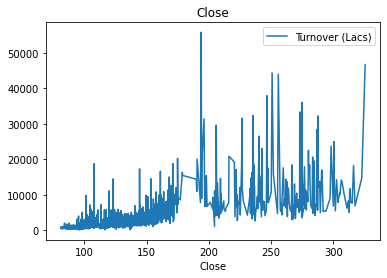

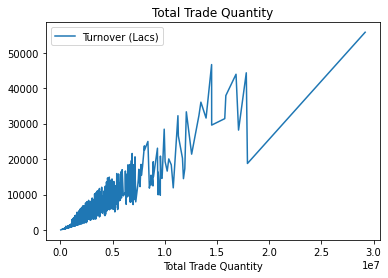

In [251]:
for feature in continous_feature:
    data=df.copy()
    df.groupby(feature)[['Turnover (Lacs)']].median().plot()
    plt.title(feature)
    plt.show()

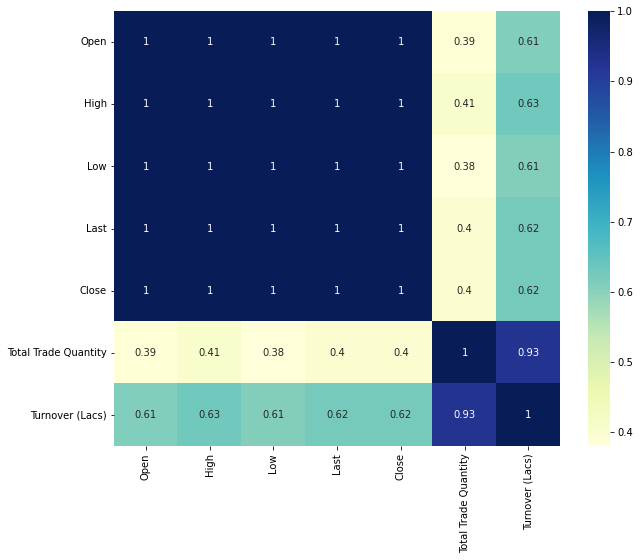

In [252]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

### Simple Linear Regression

In [253]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)', 'Month', 'Year'],
      dtype='object')

In [254]:
#Importing the dependancies for train, test, split
from sklearn.model_selection import train_test_split

x = df['Open']
y = df['Close']

In [255]:
x.head()

0    234.05
1    234.55
2    240.00
3    233.30
4    233.55
Name: Open, dtype: float64

In [256]:
y.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [257]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [258]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [259]:
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((1424,), (611,), (1424,), (611,))

In [260]:
#Reshaping the values

X1_train = X1_train.values.reshape(-1,1)
X1_test = X1_test.values.reshape(-1,1)
y1_train = y1_train.values.reshape(-1,1)
y1_test = y1_test.values.reshape(-1,1)

In [261]:
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((1424, 1), (611, 1), (1424, 1), (611, 1))

In [262]:
lr.fit(X1_train, y1_train)

LinearRegression()

In [263]:
lr.score(X1_train, y1_train) #prediction

0.9958464762778865

In [264]:
lr.fit(X1_test, y1_test) #fitting of test data

LinearRegression()

In [265]:
lr.score(X1_test, y1_test) #prediction

0.9953429192620068

### Multi-Linear Regression

In [266]:
#Importing the dependancies for train, test, split
from sklearn.model_selection import train_test_split

In [267]:
#Chossing the independent variable
x = df.drop(['Year','Month','Date','Turnover (Lacs)'], axis=1)

In [268]:
x.head()

,Open,High,Low,Last,Close,Total Trade Quantity
0,234.05,235.95,230.20,233.50,233.75,3069914
1,234.55,236.80,231.10,233.80,233.25,5082859
2,240.00,240.00,232.50,235.00,234.25,2240909
3,233.30,236.75,232.00,236.25,236.10,2349368
4,233.55,239.20,230.75,234.00,233.30,3423509


In [269]:
#choosing dependent variable
y = df['Turnover (Lacs)']

In [270]:
y.head()

0     7162.35
1    11859.95
2     5248.60
3     5503.90
4     7999.55
Name: Turnover (Lacs), dtype: float64

In [271]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

In [272]:
from sklearn.linear_model import LinearRegression

In [273]:
mlr = LinearRegression()

In [274]:
mlr.fit(X_train, y_train) #fitting the data

LinearRegression()

In [275]:
pred = mlr.predict(X_test)

In [276]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1424, 6), (611, 6), (1424,), (611,))

In [277]:
#Reshaping the values
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [278]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1424, 6), (611, 6), (1424, 1), (611, 1))

In [279]:
pred #predicitng the values

array([ 2.80536789e+03,  4.49967935e+03,  3.68798300e+03,  2.00500737e+03,
        1.05219712e+02,  2.63867790e+03,  3.26176239e+03,  9.97531478e+03,
        1.67905348e+03,  3.19980669e+03,  2.22605897e+03,  1.61983862e+03,
        1.74505915e+03,  9.57080859e+03,  3.15594940e+03,  8.87938404e+03,
        2.87814279e+03,  5.56422228e+03,  1.15317303e+03, -4.97067528e+02,
        3.28227010e+03,  1.25619882e+03,  6.65834512e+02,  3.33974083e+03,
        3.51210590e+03, -2.01136783e+02,  6.39827702e+03,  2.00089498e+03,
        1.37759505e+04, -5.33963314e+01,  3.42074425e+03,  1.42330268e+04,
        1.18684667e+04,  2.51289272e+03,  1.65268504e+03,  1.79886462e+03,
        3.95526868e+03,  1.52006418e+03,  6.53240154e+02,  2.11200619e+03,
        2.25056936e+03,  2.03688334e+03,  9.58131525e+03,  2.21985009e+03,
        8.66463569e+02,  7.74696356e+03,  7.05478457e+03,  7.15923750e+03,
        7.30602088e+03,  8.15205337e+03,  3.77624560e+02,  1.53114287e+03,
        1.95126315e+03, -

In [280]:
mlr.score(X_test, y_test) #prediction

0.937379299237068

### Decision Tree

In [281]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train) #fitting the data

DecisionTreeRegressor()

In [282]:
y_train_pred = reg.predict(X_train)
y_train_pred #predicting further values

array([14680.57,  1353.39,  2073.89, ...,  2798.81,  3275.46,  2070.14])

In [283]:
y_pred=reg.predict(X_test)

In [284]:
y_pred #predicting the values

array([ 2555.63,  4069.22,  3406.94,  1929.81,   802.94,  2161.16,
        3009.66,  8332.23,  1826.33,  2815.35,  2243.74,  1651.49,
        1695.44,  9004.67,  3009.66,  8614.03,  2645.54,  5157.88,
        1242.12,   381.52,  3121.95,  1424.64,  1345.46,  2934.15,
        2952.57,   692.32,  5797.01,  2152.68, 12129.82,   732.04,
        3262.18, 12435.78, 15295.87,  2557.45,  1584.73,  1720.32,
        3546.48,  1568.72,   812.5 ,  1827.19,  2168.84,  1902.4 ,
       10341.97,  2042.54,  1276.1 ,  5938.16,  5685.22,  5810.86,
        6743.59,  7893.32,   923.04,  1679.79,  1901.94,   448.88,
        1431.57,  1692.05, 12105.05, 12889.29,  5810.86,  1090.57,
       12435.78,  1983.  ,  1061.56, 12129.82, 13416.32,  2333.97,
        3097.04,  2649.89,  4268.15,  3920.26,  3209.4 ,  7143.47,
        2069.88, 15295.87,  1250.08,  1095.86,  2516.83,  3127.28,
        6987.01,  1735.52,  6433.14,   375.07,  2567.36,  1827.19,
        7480.92,  3446.81,  1175.14,  2629.82,   825.82,  3102

In [285]:
reg.score(X_test,y_test) #predicting accuracy

0.9216226237377443

### Random Forest

In [286]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) #Scaling the data
X_test_std = sc.transform(X_test) 

In [287]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train_std,y_train) #fitting the data
rf_tree_y_pred = rf_tree.predict(X_train_std)
print("Accuracy: {}".format(rf_tree.score(X_test_std,y_test))) #prediction

Accuracy: 0.9540112815095908


In [288]:
rf_tree_y_pred #Predicting the values

array([14597.5926,  1321.5565,  2065.4808, ...,  2871.9812,  3293.8143,
        2063.3215])

### DashBoard

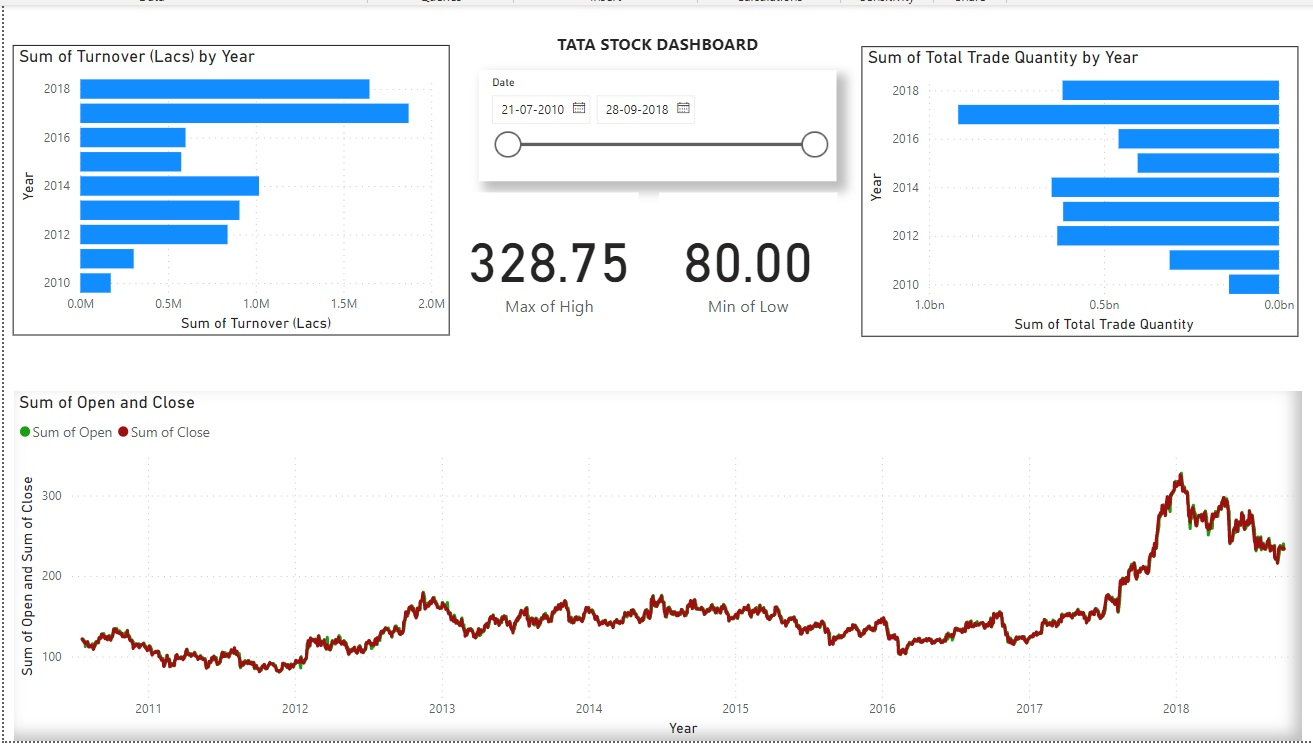

### Conclusion

In [289]:
print("The accuracy for Simple-Linear Regression is: {}".format(lr.score(X1_test, y1_test)))
print("The accuracy for Multi-Linear Regression is: {}".format(mlr.score(X_test, y_test)))
print("The accuracy for Decision Tree is: {}".format(reg.score(X_test,y_test)))
print("The accuracy for Random Forest Regressor is: {}".format(rf_tree.score(X_test_std,y_test)))

The accuracy for Simple-Linear Regression is: 0.9953429192620068
The accuracy for Multi-Linear Regression is: 0.937379299237068
The accuracy for Decision Tree is: 0.9216226237377443
The accuracy for Random Forest Regressor is: 0.9540112815095908


The accuracy if Simple Linear regression is the highest but we won't comsider it as it deals with only one feature.We can also see that the Random Forest Regressor gives 95% accuracy for TATA Stock for test dataset followed by Linear Regression and Decision Tree with 93.73% and 93.63% respectively. 